## Pandas Exercises

### Excercise 1
- Using the imdb top 1000 movies dataset find the following 
    - Get rid of useless columns 
    - Oldest movie 
    - Newest movie 
    - Top 10 movies by IMDB rating  
    - Top movie for each genre 
    - Director with the most movies 
    - Star with the most movies  
    - Highest grossing movie for each genre 
    - Lowest grossing movie for each director 
    - Save the dataframe as a parquet file 
    - Aggregate the gross revenue for all 1000 movies. 


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./Data/imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
# Cleaning Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
# Changing gross dtype from object to float
df["Gross"] = df["Gross"].str.replace(",", "").astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int64(1), object(12)
memory usage: 125.1+ KB


In [5]:
# Dropping useless columns

df.drop(["Poster_Link", "Overview"], axis=1, inplace=True)
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [6]:
# Finding the oldest movie

# Filter out movies with a non number release year
filtered_df = df[pd.to_numeric(df["Released_Year"], errors="coerce").notnull()]

oldest_year = filtered_df["Released_Year"].min()
print("The oldest movie is:")
df.loc[df["Released_Year"] == oldest_year]

The oldest movie is:


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
321,Das Cabinet des Dr. Caligari,1920,NaN,76 min,"Fantasy, Horror, Mystery",8.1,NaN,Robert Wiene,Werner Krauss,Conrad Veidt,Friedrich Feher,Lil Dagover,57428,NaN


In [7]:
# Finding the newest movie

# filter out movies with a non number release year
filtered_df = df[pd.to_numeric(df["Released_Year"], errors="coerce").notnull()]
newest_year = filtered_df["Released_Year"].max()
print("The newest movies are:")
df.loc[df["Released_Year"] == newest_year]

The newest movies are:


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,NaN
20,Soorarai Pottru,2020,U,153 min,Drama,8.6,NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
205,Soul,2020,U,100 min,"Animation, Adventure, Comedy",8.1,83.0,Pete Docter,Kemp Powers,Jamie Foxx,Tina Fey,Graham Norton,159171,NaN
464,Dil Bechara,2020,UA,101 min,"Comedy, Drama, Romance",7.9,NaN,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,Sahil Vaid,Saswata Chatterjee,111478,NaN
612,The Trial of the Chicago 7,2020,R,129 min,"Drama, History, Thriller",7.8,77.0,Aaron Sorkin,Eddie Redmayne,Alex Sharp,Sacha Baron Cohen,Jeremy Strong,89896,NaN
613,Druk,2020,NaN,117 min,"Comedy, Drama",7.8,81.0,Thomas Vinterberg,Mads Mikkelsen,Thomas Bo Larsen,Magnus Millang,Lars Ranthe,33931,NaN


In [8]:
# Find top 10 movies by IMDB Rating

print("The top 10 movies by IMDB Rating are:")
# Both work but nlargest might be better bc it doesnt have to sort everything
#df.sort_values("IMDB_Rating", ascending=False).head(10)
df.nlargest(10, "IMDB_Rating")

The top 10 movies by IMDB Rating are:


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
6,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0
7,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818.0
8,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0
9,Fight Club,1999,A,139 min,Drama,8.8,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102.0


In [9]:
# Top Movie for each genre

import re

# Finding all the genres
genre_set = set()
for g in df["Genre"]:
    for i in re.split(", ", g):
        genre_set.add(i)

# print(genre_set)

for genre in genre_set:
    # Filters for all movies of a genre
    genre_movies = df[df["Genre"].str.contains(genre)]
    # Find the highest rated movie in the filtered df
    top_movie = genre_movies.nlargest(1, "IMDB_Rating")
    print(f'The top movie for the {genre} genre is \"{top_movie['Series_Title'].values[0]}\" with an  IMDB rating of {top_movie['IMDB_Rating'].values[0]}')

The top movie for the Comedy genre is "Gisaengchung" with an  IMDB rating of 8.6
The top movie for the History genre is "Schindler's List" with an  IMDB rating of 8.9
The top movie for the Western genre is "Il buono, il brutto, il cattivo" with an  IMDB rating of 8.8
The top movie for the Animation genre is "Sen to Chihiro no kamikakushi" with an  IMDB rating of 8.6
The top movie for the Music genre is "Whiplash" with an  IMDB rating of 8.5
The top movie for the Sci-Fi genre is "Inception" with an  IMDB rating of 8.8
The top movie for the Crime genre is "The Godfather" with an  IMDB rating of 9.2
The top movie for the Family genre is "Sen to Chihiro no kamikakushi" with an  IMDB rating of 8.6
The top movie for the Mystery genre is "Se7en" with an  IMDB rating of 8.6
The top movie for the Sport genre is "Bacheha-Ye aseman" with an  IMDB rating of 8.3
The top movie for the Fantasy genre is "Star Wars: Episode V - The Empire Strikes Back" with an  IMDB rating of 8.7
The top movie for the 

In [10]:
# Director with the most movies
most_movies = df["Director"].value_counts().head(1)

print(f"The director with the most movies is {most_movies.index[0]} with {most_movies.iloc[0]} movies directed")

The director with the most movies is Alfred Hitchcock with 14 movies directed


In [11]:
# Stars with the most movies.

# Counts how many times each actor appears in star1-4
star1 = df["Star1"].value_counts()
star2 = df["Star2"].value_counts()
star3 = df["Star3"].value_counts()
star4 = df["Star4"].value_counts()

# Combines the above information into a df
all_stars = pd.concat([star1, star2, star3, star4], axis=1).fillna(0)

# Sums up all star appearances and sort by high to low
summed = all_stars.sum(axis=1).sort_values(ascending=False)
print(summed.head())
print(f"The star with the most movies is {summed.idxmax()}")

Robert De Niro    17.0
Tom Hanks         14.0
Al Pacino         13.0
Clint Eastwood    12.0
Brad Pitt         12.0
dtype: float64
The star with the most movies is Robert De Niro


In [12]:
# Highest grossing movie for each genre

# Using the set of all genres we have from the previous exercise
for genre in genre_set:
    # Filters for all movies of a genre
    genre_movies = df[df["Genre"].str.contains(genre)]

    # not necessary anymore
    # Converts the information from the gross column into numbers
    # genre_movies.loc[:, "Gross"] = genre_movies["Gross"].str.replace(',','').astype(float)
    # genre_movies.loc[:, "Gross"] = pd.to_numeric(df["Gross"].str.replace(",", ""))
    # genre_movies.dropna(subset=["Gross"], inplace=True)

    # Find the highest rated movie in the filtered df
    top_movie = genre_movies.sort_values("Gross", ascending=False).head(1)
    print(f'The highest grossing movie for the {genre} genre is \"{top_movie['Series_Title'].values[0]}\" with an grossing of {'${:,.2f}'.format(top_movie['Gross'].values[0])}')

The highest grossing movie for the Comedy genre is "Toy Story 4" with an grossing of $434,038,008.00
The highest grossing movie for the History genre is "Gone with the Wind" with an grossing of $198,676,459.00
The highest grossing movie for the Western genre is "Dances with Wolves" with an grossing of $184,208,848.00
The highest grossing movie for the Animation genre is "Incredibles 2" with an grossing of $608,581,744.00
The highest grossing movie for the Music genre is "Bohemian Rhapsody" with an grossing of $216,428,042.00
The highest grossing movie for the Sci-Fi genre is "Star Wars: Episode VII - The Force Awakens" with an grossing of $936,662,225.00
The highest grossing movie for the Crime genre is "The Dark Knight" with an grossing of $534,858,444.00
The highest grossing movie for the Family genre is "E.T. the Extra-Terrestrial" with an grossing of $435,110,554.00
The highest grossing movie for the Mystery genre is "The Sixth Sense" with an grossing of $293,506,292.00
The highest

In [13]:
# Lowest grossing movie for each director

# Gets a set of all directors
director_set = set(df["Director"].values)

for director in director_set:
    # Filters for movies made by a director
    filtered = df.loc[df["Director"] == director]
    #lowest_movie = filtered.sort_values("Gross").head(1)
    lowest_movie = filtered.nsmallest(1, "Gross")
    print(
        f"The lowest grossing move made by {director} is \"{lowest_movie['Series_Title'].values[0]}\""
    )

The lowest grossing move made by Akira Kurosawa is "Ikiru"
The lowest grossing move made by Mel Brooks is "Young Frankenstein"
The lowest grossing move made by Xavier Dolan is "Mommy"
The lowest grossing move made by Robert Wise is "The Sound of Music"
The lowest grossing move made by Isao Takahata is "Omohide poro poro"
The lowest grossing move made by Cary Joji Fukunaga is "Beasts of No Nation"
The lowest grossing move made by John G. Avildsen is "Rocky"
The lowest grossing move made by Danis Tanovic is "No Man's Land"
The lowest grossing move made by Sergio Pablos is "Klaus"
The lowest grossing move made by Michel Hazanavicius is "The Artist"
The lowest grossing move made by Sam Peckinpah is "The Wild Bunch"
The lowest grossing move made by Alejandro Jodorowsky is "La montaña sagrada"
The lowest grossing move made by Mike Nichols is "The Graduate"
The lowest grossing move made by Thomas Jahn is "Knockin' on Heaven's Door"
The lowest grossing move made by Darren Aronofsky is "Requiem

In [14]:
# Saving the dataframe to a parquet file
df.to_parquet("./Data/imdb_top_1000.parquet")

In [15]:
# Aggregate the gross revenue for all 1000 movies.
gross_stats = df.agg({"Gross": ["mean", "median", "min", "max"]})
gross_stats

,Gross
mean,6.803475e+07
median,2.353089e+07
min,1.305000e+03
max,9.366622e+08


## Excercise 2
- DICOM Image Processor 
    - [https://www.kaggle.com/competitions/osic-pulmonary-fibrosis-progression/overview] 
    - Load a DICOM image into Python 
    - Convert them into a gif 
        - Use PILLOW  

In [32]:
import pydicom as dicom
import matplotlib.pylab as plt
from PIL import Image

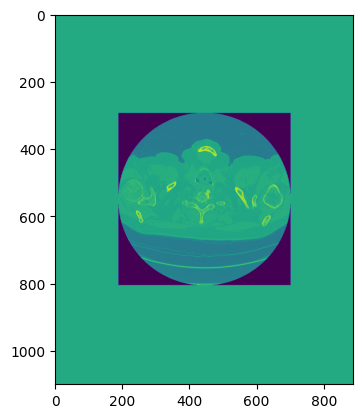

In [54]:
# Loading DICOM image into PYTHON
image = "./Data/dicom/1.dcm"
ds = dicom.dcmread(image)
plt.imshow(ds.pixel_array)

In [58]:
# Converting to gif using PILLOW

import glob

frames = []

for image in glob.glob("./Data/dicom/*.dcm"):
    ds = dicom.dcmread(image)
    frames.append(Image.fromarray(ds.pixel_array))

frame_one = frames[0]
frame_one.save(
    "./Data/dicom.gif",
    format="GIF",
    append_images=frames,
    save_all=True,
    duration=100,
    loop=0,
)


![MyGif](./Data/dicom.gif "segment")